In [1]:
import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb

In [2]:
df = pd.read_excel('preprocessed data.xlsx')


In [3]:
df.head()

,Unnamed: 0,sl.no.,0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence,tumor size,node status of the tumor,Age of the patient,tumor grade,A%-M,AI-M,A%-C,...,R%-C,U%-C,V%-C,W%-M,W%-C,ZA1%-M,ZA1%-C,ZB%-C,ZC%-C,ZD%-C
0,0,1,0,2,1,60,3,0,2.5,70,...,70,80,75,70,60,85,60,80,85,70
1,1,2,0,1,1,55,2,15,2.0,20,...,75,80,75,80,60,85,60,80,80,80
2,2,3,0,1,1,33,3,0,2.5,70,...,60,75,70,70,70,55,70,75,80,75
3,3,4,0,1,1,67,2,0,2.0,45,...,70,75,60,45,70,60,70,75,80,80
4,4,5,0,1,1,47,2,0,0.0,0,...,75,75,80,70,75,85,75,80,80,80


In [4]:
X_res = df.iloc[:,3:].values
y_res = df.iloc[:,2].values


In [5]:
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


In [6]:
nm = NearMiss()
X_res,y_res = nm.fit_sample(X_res,y_res)

In [7]:
y_res.shape

(86,)

In [8]:
X_res.shape

(86, 84)

In [9]:
df.describe()

,Unnamed: 0,sl.no.,0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence,tumor size,node status of the tumor,Age of the patient,tumor grade,A%-M,AI-M,A%-C,...,R%-C,U%-C,V%-C,W%-M,W%-C,ZA1%-M,ZA1%-C,ZB%-C,ZC%-C,ZD%-C
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,116.500000,117.500000,0.183761,1.944444,0.705128,48.974359,2.598291,6.581197,1.737179,29.102564,...,73.846154,75.320513,71.559829,69.401709,70.170940,74.615385,70.170940,72.264957,76.303419,74.914530
std,67.694165,67.694165,0.388119,0.525234,0.670193,10.551294,0.533188,17.617168,0.849354,30.409335,...,6.804587,6.232602,7.427955,10.454528,8.957018,6.457316,8.957018,8.491241,5.851326,5.913646
min,0.000000,1.000000,0.000000,1.000000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,...,60.000000,55.000000,50.000000,40.000000,40.000000,55.000000,40.000000,50.000000,55.000000,55.000000
25%,58.250000,59.250000,0.000000,2.000000,0.000000,41.000000,2.000000,0.000000,1.500000,0.000000,...,70.000000,70.000000,70.000000,65.000000,65.000000,70.000000,65.000000,70.000000,71.250000,70.000000
50%,116.500000,117.500000,0.000000,2.000000,1.000000,49.000000,3.000000,0.000000,2.000000,20.000000,...,75.000000,75.000000,70.000000,70.000000,70.000000,75.000000,70.000000,70.000000,80.000000,75.000000
75%,174.750000,175.750000,0.000000,2.000000,1.000000,56.750000,3.000000,0.000000,2.000000,60.000000,...,80.000000,80.000000,75.000000,75.000000,78.750000,80.000000,78.750000,80.000000,80.000000,80.000000
max,233.000000,234.000000,1.000000,3.000000,3.000000,75.000000,3.000000,80.000000,3.000000,80.000000,...,90.000000,90.000000,90.000000,95.000000,85.000000,90.000000,85.000000,85.000000,90.000000,85.000000


In [10]:
# Principal component analysis
pca = PCA(n_components = 2)
pca_2d = pca.fit_transform(X_res)

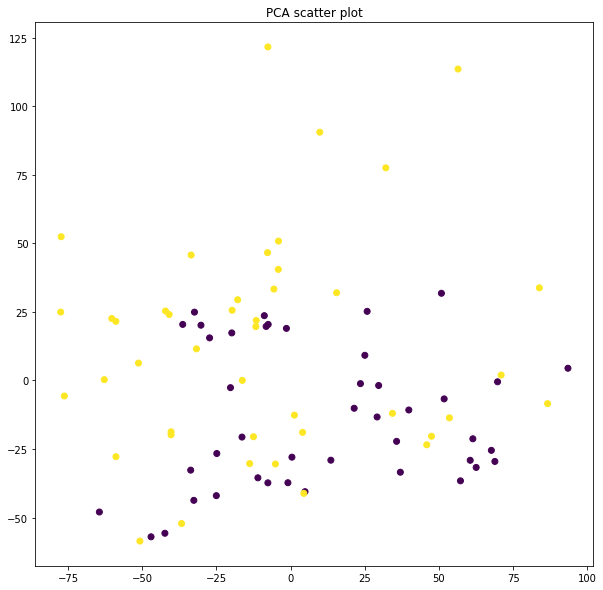

In [11]:
plt.figure(figsize = (10, 10))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = y_res)
plt.title('PCA scatter plot')
plt.show()

perplexity: 2
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 86 samples in 0.000s...
[t-SNE] Computed neighbors for 86 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 86 / 86
[t-SNE] Mean sigma: 15.555949
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.813950
[t-SNE] KL divergence after 1000 iterations: 1.507663
perplexity: 5
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 86 samples in 0.000s...
[t-SNE] Computed neighbors for 86 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 86 / 86
[t-SNE] Mean sigma: 26.354194
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.772163
[t-SNE] KL divergence after 1000 iterations: 1.151360
perplexity: 10
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 86 samples in 0.000s...
[t-SNE] Computed neighbors for 86 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 86 / 86
[t-SNE] Mean sigma: 33.440362
[t-SNE]

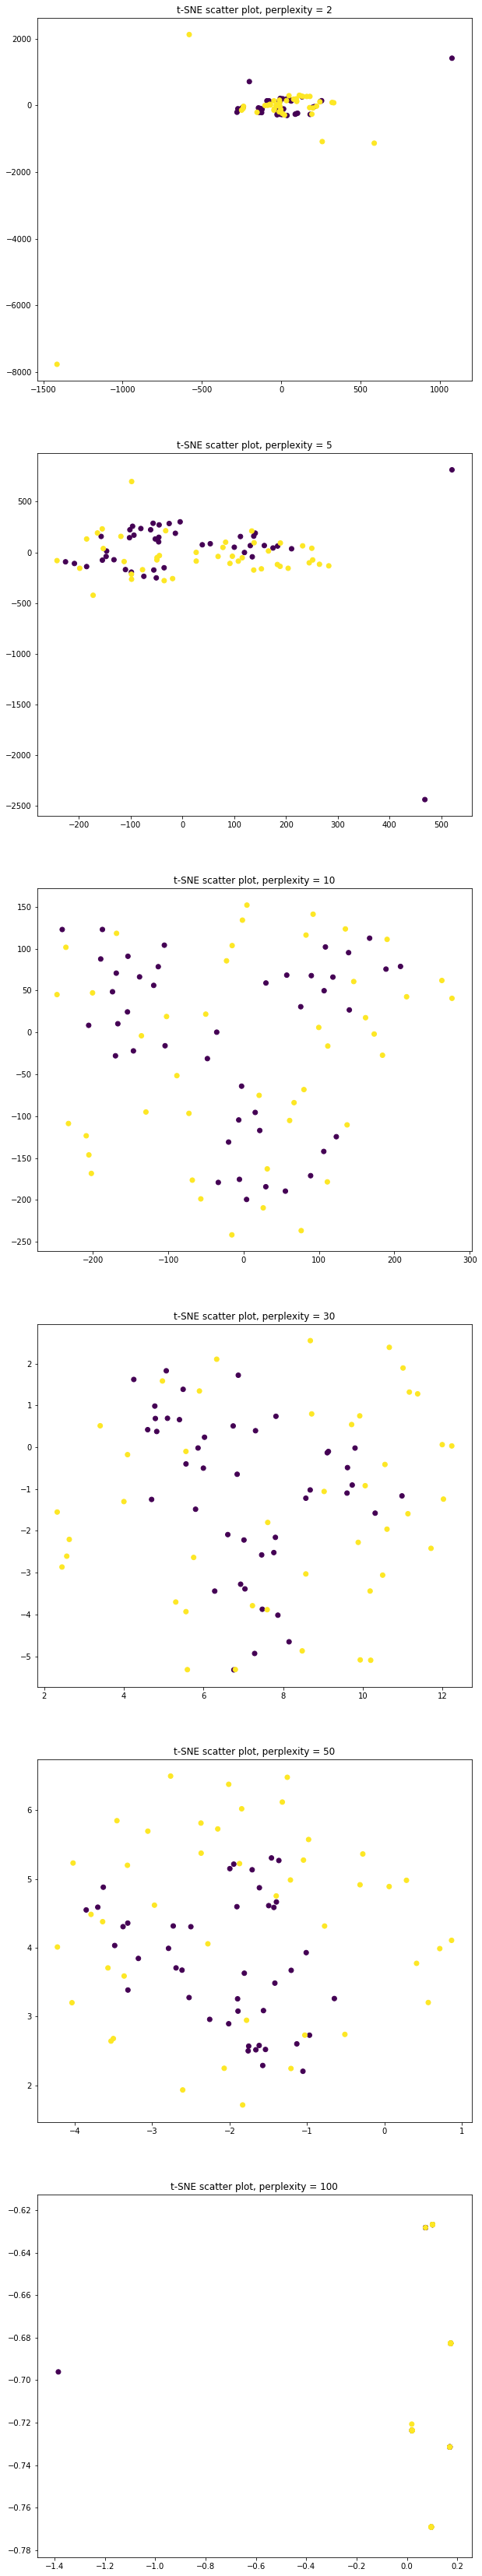

In [12]:
perplexities = (2, 5, 10, 30, 50, 100)
plt.figure(figsize = (10, 10*len(perplexities)))
for i, perplex in enumerate(perplexities):
    print('perplexity: {}'.format(perplex))
    tsne = TSNE(n_components = 2, perplexity = perplex, n_iter = 1000, verbose = 1)
    tsne_2d = tsne.fit_transform(X_res)
    
    plt.subplot(int('{}1{}'.format(len(perplexities), i+1)))
    plt.title('t-SNE scatter plot, perplexity = {}'.format(perplex))
    plt.scatter(tsne_2d[:,0], tsne_2d[:,1], c = y_res)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.1, random_state = 0)


In [14]:
# Deep learning Keras stuff
from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

model = Sequential()
model.add(Dense(32, input_dim = 84, init = 'uniform'))
model.add(Activation('relu'))
model.add(Dense(16, init = 'uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init = 'uniform'))

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.fit(scaler.transform(X_train), y_train, nb_epoch = 20, batch_size = 10)

/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=84, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="uniform")`
  del sys.path[0]
/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
77/77 [==============================] - 0s 1ms/step - loss: 1.0533 - accuracy: 0.5065
Epoch 2/20
77/77 [==============================] - 0s 83us/step - loss: 0.8959 - accuracy: 0.5065
Epoch 3/20
77/77 [==============================] - 0s 86us/step - loss: 0.8017 - accuracy: 0.5065
Epoch 4/20
77/77 [==============================] - 0s 92us/step - loss: 0.7434 - accuracy: 0.5065
Epoch 5/20
77/77 [==============================] - 0s 99us/step - loss: 0.7009 - accuracy: 0.5065
Epoch 6/20
77/77 [==============================] - 0s 88us/step - loss: 0.6676 - accuracy: 0.5195
Epoch 7/20
77/77 [==============================] - 0s 85us/step - loss: 0.6363 - accuracy: 0.5974
Epoch 8/20
77/77 [==============================] - 0s 87us/step - loss: 0.6098 - accuracy: 0.7922
Epoch 9/20
77/77 [==============================] - 0s 85us/step - loss: 0.5845 - accuracy: 0.9091
Epoch 10/20
77/77 [==============================] - 0s 83us/step - loss: 0.5603 - accuracy: 0.9221
Epoch 11/2

In [15]:
y_keras_pred = model.predict_classes(scaler.transform(X_test))
print('Accuracy: {}'.format(np.sum(y_keras_pred[:,0] == y_test) / float(len(y_test))))

Accuracy: 0.6666666666666666


In [16]:
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_keras_pred))
print(confusion_matrix(y_test,y_keras_pred))
print(classification_report(y_test,y_keras_pred))

0.6666666666666666
[[1 3]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.62      1.00      0.77         5

    accuracy                           0.67         9
   macro avg       0.81      0.62      0.58         9
weighted avg       0.79      0.67      0.61         9

